In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

sns.set(rc={'figure.figsize':(16,9)})

In [281]:
data_folder = './data/'
output_folder = './output/'
figs_folder = './output/figs/'

In [21]:
df = pd.read_csv(data_folder + 'data_all.csv')
df['czas'] = pd.to_datetime(df['czas'])

temp_zuz = pd.read_csv(data_folder + 'temp_zuz.csv', sep=';')
temp_zuz['czas_utc']  = pd.to_datetime(temp_zuz['Czas']).dt.tz_localize('CET', ambiguous = 'NaT').dt.tz_convert('UTC')

###zostawianie jedynie pełnych godzin pomiarow
temp_zuz = temp_zuz[temp_zuz['czas_utc'].dt.minute == 0]

In [278]:
temp_zuz

,Czas,temp_zuz,czas_utc
0,2020-10-01 00:00:00,1297,2020-09-30 22:00:00+00:00
1,2020-10-01 01:00:00,1295,2020-09-30 23:00:00+00:00
2,2020-10-01 02:00:00,1303,2020-10-01 00:00:00+00:00
4,2020-10-01 03:00:00,1303,2020-10-01 01:00:00+00:00
5,2020-10-01 04:00:00,1306,2020-10-01 02:00:00+00:00
...,...,...,...
11379,2022-01-31 20:00:00,1305,2022-01-31 19:00:00+00:00
11380,2022-01-31 21:00:00,1304,2022-01-31 20:00:00+00:00
11381,2022-01-31 22:00:00,1308,2022-01-31 21:00:00+00:00
11382,2022-01-31 23:00:00,1309,2022-01-31 22:00:00+00:00


In [277]:
df

,czas,REG NADAWY KONCENTRATU LIW1 [Mg/h],REG NADAWY KONCENTRATU LIW2 [Mg/h],REG KONCENTRAT PRAZONY LIW3 [Mg/h],REG PYL ZWROT LIW4 [Mg/h],WODA CHŁODZĄCA DO KOLEKTOR KZ7 [m3/h],WODA CHŁODZĄCA DO KOLEKTOR KZ8 [m3/h],WODA CHŁODZĄCA DO KOLEKTOR KZ9 [m3/h],WODA CHŁODZĄCA DO KOLEKTOR KZ10 [m3/h],WODA CHŁODZĄCA DO KOLEKTOR KZ11 [m3/h],...,WENT. RF01 ODCZ_ZAD OBROTÓW [%],WENT. RF02 ODCZ_ZAD OBROTÓW [%],WENT. RF03 ODCZ_ZAD OBROTÓW [%],TEMP. WODY ZASIL.OBIEG PZ 1[°C],TEMP. WODY ZASIL.OBIEG PZ 2[°C],Prażona mieszanina koncentratów HG1 - fe [%],Prażona mieszanina koncentratów HG1 - sog [%],prob_corg [%],prob_fe [%],prob_s [%]
0,2020-09-30 22:00:00+00:00,56.729077,54.724422,11.966905,22.493207,108.702362,112.280388,110.013796,108.761583,110.604901,...,92.090454,92.024078,92.405281,24.665309,24.526161,4.48,8.98,8.6,4.55,9.87
1,2020-09-30 22:01:00+00:00,54.771942,54.734675,12.026410,22.593412,108.846612,112.334600,109.906645,108.879083,110.644046,...,92.090534,92.024206,92.405239,24.663982,24.526161,4.48,8.98,8.6,4.55,9.87
2,2020-09-30 22:02:00+00:00,54.695816,54.774163,11.953671,22.428933,108.827640,112.362508,109.970932,108.844765,110.621665,...,92.090613,92.024334,92.405196,24.662656,24.526161,4.48,8.98,8.6,4.55,9.87
3,2020-09-30 22:03:00+00:00,54.154394,54.985713,12.052065,22.335388,108.623473,112.386061,109.836948,108.717994,110.464245,...,92.090692,92.024462,92.405153,24.661329,24.526161,4.48,8.98,8.6,4.55,9.87
4,2020-09-30 22:04:00+00:00,54.693184,54.490742,12.027310,22.412620,108.746784,112.396792,109.966910,108.978605,110.603660,...,92.090771,92.024590,92.405110,24.660003,24.525475,4.48,8.98,8.6,4.55,9.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702775,2022-01-31 22:55:00+00:00,57.882366,58.080133,10.056829,30.486496,101.111263,98.338021,102.332506,101.967828,100.651891,...,98.016144,98.121880,98.225985,24.460338,24.320295,6.18,8.89,7.8,6.65,12.47
702776,2022-01-31 22:56:00+00:00,57.953225,57.931008,9.935828,29.830075,101.034501,98.362465,102.332450,101.981035,100.575884,...,98.016144,98.121319,98.226027,24.464324,24.322539,6.18,8.89,7.8,6.65,12.47
702777,2022-01-31 22:57:00+00:00,58.186232,57.291012,10.014864,29.350514,101.251020,98.353221,102.312023,102.017297,100.621084,...,98.016144,98.120757,98.226070,24.468310,24.324782,6.18,8.89,7.8,6.65,12.47
702778,2022-01-31 22:58:00+00:00,59.016838,58.014325,10.048125,29.496899,101.073264,98.354741,102.336123,101.967655,100.596174,...,98.016144,98.120196,98.226113,24.472296,24.327025,6.18,8.89,7.8,6.65,12.47


In [59]:
df_tidy = pd.DataFrame()

df_tidy['czas'] = pd.to_datetime(df['czas'])

    


df_tidy['woda_powrotna_przeplyw'] = (
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ7 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ8 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ9 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ10 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ11 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ12 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ13 [m3/h]'] + 
    df['WODA CHŁODZĄCA DO KOLEKTOR KZ15 [m3/h]']
)


df_tidy['woda_powrotna_temp'] = (
    df['WODA POWROTNA KOLEKTORA KZ7 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ7 [m3/h]'] + 
    df['WODA POWROTNA KOLEKTORA KZ8 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ8 [m3/h]'] + 
    df['WODA POWROTNA KOLEKTORA KZ9 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ9 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ10 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ10 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ11 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ11 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ12 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ12 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ13 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ13 [m3/h]'] +   
    df['WODA POWROTNA KOLEKTORA KZ15 [°C]']*df['WODA CHŁODZĄCA DO KOLEKTOR KZ15 [m3/h]'] 
) / df_tidy['woda_powrotna_przeplyw']



df_tidy['woda_zasil_temp'] = (df['TEMP. WODY ZASIL.OBIEG PZ 1[°C]'] + df['TEMP. WODY ZASIL.OBIEG PZ 2[°C]'])/2

df_tidy['koncentrat'] = df['REG NADAWY KONCENTRATU LIW1 [Mg/h]'] + df['REG NADAWY KONCENTRATU LIW2 [Mg/h]']

df_tidy['pyl'] = df['REG PYL ZWROT LIW4 [Mg/h]']

df_tidy['prazonka'] = df['REG KONCENTRAT PRAZONY LIW3 [Mg/h]']

df_tidy['wymurowka_temp'] = (
    df['TEMP.17 POD 2 WARSTWĄ WYMURÓWKI [°C]']+
    df['TEMP.18 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.19 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.20 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.21 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP22 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.23 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.24 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.9 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.10 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.11 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.12 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.13 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.14 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.15 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.16 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.1 POD 2 WARSTWĄ WYMURÓWKI [°C]']+   
    df['TEMP.2 POD 2 WARSTWĄ WYMURÓWKI [°C]']+   
    df['TEMP.3 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.4 POD 2 WARSTWĄ WYMURÓWKI [°C]']+   
    df['TEMP.5 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.6 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.7 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    
    df['TEMP.8 POD 2 WARSTWĄ WYMURÓWKI [°C]']) / 24

df_tidy['prob_corg_proc'] = df['prob_corg [%]'] 
df_tidy['prob_s_proc'] = df['prob_s [%]'] 
df_tidy['prob_fe_proc'] = df['prob_fe [%]'] 
df_tidy['prob_corg_masa'] = df['prob_corg [%]'] * df_tidy['koncentrat']
df_tidy['prob_s_masa'] = df['prob_s [%]'] * df_tidy['koncentrat']
df_tidy['prob_fe_masa'] = df['prob_fe [%]'] * df_tidy['koncentrat']




df_tidy['prazonka_fe_proc'] = df['Prażona mieszanina koncentratów HG1 - fe [%]']
df_tidy['prazonka_s_proc'] = df['Prażona mieszanina koncentratów HG1 - sog [%]']
df_tidy['prazonka_fe_masa'] = df['Prażona mieszanina koncentratów HG1 - fe [%]'] * df_tidy['prazonka']
df_tidy['prazonka_s_masa'] = df['Prażona mieszanina koncentratów HG1 - sog [%]'] * df_tidy['prazonka']

df_tidy['wentylator'] = (df['WENT.  RF01\xa0 ODCZ_ZAD OBROTÓW [%]'] + df['WENT.  RF02 ODCZ_ZAD OBROTÓW [%]'] + df['WENT.  RF03\xa0 ODCZ_ZAD OBROTÓW [%]'])/3

df_tidy['moc_cieplna_odebrana'] = df['SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA [MW]']

df_tidy['kol_kan_temp'] = (df['TEMP.\xa0 NA KOL.. KAN.1-34 [°C]'] + df['TEMP.\xa0 NA KOL.. KAN.35-68 [°C]'])/2


df_tidy['godzina'] = (df_tidy['czas'].dt.hour).mod(8).astype(object)

In [65]:
df_tidy.dtypes

czas                      datetime64[ns, UTC]
woda_powrotna_przeplyw                float64
woda_powrotna_temp                    float64
woda_zasil_temp                       float64
koncentrat                            float64
pyl                                   float64
prazonka                              float64
wymurowka_temp                        float64
prob_corg_proc                        float64
prob_s_proc                           float64
prob_fe_proc                          float64
prob_corg_masa                        float64
prob_s_masa                           float64
prob_fe_masa                          float64
prazonka_fe_proc                      float64
prazonka_s_proc                       float64
prazonka_fe_masa                      float64
prazonka_s_masa                       float64
wentylator                            float64
moc_cieplna_odebrana                  float64
kol_kan_temp                          float64
godzina                           

## Sprawdzanie przerw w danych

brak przerw

In [58]:
#for i in df.iloc[:,34:]:
#    fig, ax = plt.subplots()
#    sns.lineplot(
#        data = df,
#        x= 'czas',
#        y=i
#    )
#    ax.set(title = i)
#    idx = i.find('[')
#    filename = i  
#    if idx!=-1:
#        filename = filename[:idx]
#    path = os.path.join(figs_folder, filename+".png")
#    plt.savefig(fname = path) 
#    plt.close('all')

### Korelacja zmiennych - optymalne okno

In [266]:
dict_check = dict()

for time_end in range(0,60,10):
    for time_length in [0, 1, 4, 9, 14, 19, 29, 44, 59]:
        df_tidy['czas_temp'] = df_tidy['czas']+pd.Timedelta(time_end + time_length,'m')
        df_tidy_temp = pd.DataFrame(df_tidy[df_tidy['czas_temp'].dt.minute <=time_length])
        df_tidy_temp['czas_bin'] = df_tidy_temp['czas_temp'].dt.floor('H', ambiguous = 'NaT')
        
        df_tidy_temp = pd.merge(
            temp_zuz[['temp_zuz', 'czas_utc']],
            df_tidy_temp, 
            left_on = 'czas_utc', 
            right_on='czas_bin',
            how = 'inner')
        df_tidy_temp = df_tidy_temp.groupby('czas_bin').agg({
            'temp_zuz' : 'max', #w jednym oknie tylko jedna wartość, równie dobrze mogłaby być dowolna agregacja
            'woda_powrotna_przeplyw':'mean',  
            'woda_powrotna_temp':'mean',     
            'woda_zasil_temp':'mean',        
            'koncentrat':'mean',             
            'pyl':'mean',                    
            'prazonka':'mean',               
            'wymurowka_temp':'mean',         
            'prob_corg_proc':'mean',         
            'prob_s_proc':'mean',            
            'prob_fe_proc':'mean',           
            'prob_corg_masa':'mean',         
            'prob_s_masa':'mean',            
            'prob_fe_masa':'mean',           
            'prazonka_fe_proc':'mean',       
            'prazonka_s_proc':'mean',        
            'prazonka_fe_masa':'mean',       
            'prazonka_s_masa':'mean',        
            'wentylator':'mean',             
            'moc_cieplna_odebrana':'mean',   
            'kol_kan_temp':'mean',           
            'godzina':'mean',                
            'time_temp':'mean'           
        })
        dict_check[
            'end:' + str(time_end) + 
            ' len:' + str(time_length)] = df_tidy_temp.corr().temp_zuz
        print('end:' + str(time_end) + ' len:' + str(time_length) +' done!!1')
        clear_output(wait=True)
        



for time_end in range(0,60,10):
    for time_length in ([79] + list(60*np.array(range(2,4))-1)):

        df_tidy['czas_temp'] = df_tidy['czas']+pd.Timedelta(time_end + time_length,'m')
        
        df_tidy_temp = df_tidy
        dummy_time = time_length - 60
        while dummy_time > 60:
            df_tidy['czas_temp'] = df_tidy['czas_temp'] - pd.Timedelta(60, 'm')
            df_tidy_temp = pd.concat([df_tidy_temp, df_tidy], ignore_index=True)
            dummy_time -= 60
        
        df_tidy['czas_temp'] = df_tidy['czas_temp'] - pd.Timedelta(60, 'm')
        df_tidy_temp = pd.concat([df_tidy_temp, pd.DataFrame(df_tidy[df_tidy['czas_temp'].dt.minute <=dummy_time])], ignore_index=True)
        
        
        df_tidy_temp['czas_bin'] = df_tidy_temp['czas_temp'].dt.floor('H', ambiguous = 'NaT')
        
        df_tidy_temp = pd.merge(
            temp_zuz[['temp_zuz', 'czas_utc']],
            df_tidy_temp, 
            left_on = 'czas_utc', 
            right_on='czas_bin',
            how = 'inner')
        df_tidy_temp = df_tidy_temp.groupby('czas_bin').agg({
            'temp_zuz' : 'max', #w jednym oknie tylko jedna wartość, równie dobrze mogłaby być dowolna agregacja
            'woda_powrotna_przeplyw':'mean',  
            'woda_powrotna_temp':'mean',     
            'woda_zasil_temp':'mean',        
            'koncentrat':'mean',             
            'pyl':'mean',                    
            'prazonka':'mean',               
            'wymurowka_temp':'mean',         
            'prob_corg_proc':'mean',         
            'prob_s_proc':'mean',            
            'prob_fe_proc':'mean',           
            'prob_corg_masa':'mean',         
            'prob_s_masa':'mean',            
            'prob_fe_masa':'mean',           
            'prazonka_fe_proc':'mean',       
            'prazonka_s_proc':'mean',        
            'prazonka_fe_masa':'mean',       
            'prazonka_s_masa':'mean',        
            'wentylator':'mean',             
            'moc_cieplna_odebrana':'mean',   
            'kol_kan_temp':'mean',           
            'godzina':'mean',                
            'time_temp':'mean'           
        })
        
        dict_check[
            'end:' + str(time_end) + 
            ' len:' + str(time_length)] = df_tidy_temp.corr().temp_zuz
        print('end:' + str(time_end) + ' len:' + str(time_length) +' done!!1')
        clear_output(wait=True)
        del df_tidy_temp
        
print('Done!')

Done!


In [268]:
req = pd.DataFrame(dict_check).transpose().agg(['max', 'min']).transpose().join(
    pd.DataFrame(
        {
            'max_abs_corr_ind' : pd.DataFrame(dict_check).abs().idxmax(axis=1)
        }
    )
)
req

,max,min,max_abs_corr_ind
temp_zuz,1.000000,1.000000,end:0 len:0
woda_powrotna_przeplyw,0.251405,0.245550,end:0 len:0
woda_powrotna_temp,0.135388,0.107941,end:0 len:4
woda_zasil_temp,0.070424,0.058646,end:0 len:79
koncentrat,0.233729,0.148909,end:40 len:4
pyl,0.131917,0.096392,end:50 len:179
prazonka,-0.013713,-0.033630,end:50 len:179
wymurowka_temp,0.142964,0.141847,end:0 len:79
prob_corg_proc,0.169191,0.153078,end:0 len:0
prob_s_proc,-0.075936,-0.077872,end:0 len:0


In [269]:
req.loc['prob_corg_masa','max_abs_corr_ind']='end:40 len:4'
req

,max,min,max_abs_corr_ind
temp_zuz,1.000000,1.000000,end:0 len:0
woda_powrotna_przeplyw,0.251405,0.245550,end:0 len:0
woda_powrotna_temp,0.135388,0.107941,end:0 len:4
woda_zasil_temp,0.070424,0.058646,end:0 len:79
koncentrat,0.233729,0.148909,end:40 len:4
pyl,0.131917,0.096392,end:50 len:179
prazonka,-0.013713,-0.033630,end:50 len:179
wymurowka_temp,0.142964,0.141847,end:0 len:79
prob_corg_proc,0.169191,0.153078,end:0 len:0
prob_s_proc,-0.075936,-0.077872,end:0 len:0


In [275]:
req= req.reset_index().iloc[1:21,[0,3]]

req['end'] = req['max_abs_corr_ind'].str.replace(' ', ':').str.split(':', expand = True).iloc[:,1]
req['len'] = req['max_abs_corr_ind'].str.replace(' ', ':').str.split(':', expand = True).iloc[:,3]

df_final = temp_zuz[['temp_zuz', 'czas_utc']]

for i in range(1,21):
    df_temp = pd.DataFrame(df_tidy.iloc[:,[0,i]])
    time_end = int(req['end'][i])
    time_length = int(req['len'][i])
    if time_length<60 :
        
        df_temp['czas_temp'] = df_temp['czas']+pd.Timedelta(time_end + time_length,'m')
        df_temp = pd.DataFrame(df_temp[df_temp['czas_temp'].dt.minute <=time_length])
        
        df_temp['czas_utc'] = df_temp['czas_temp'].dt.floor('H', ambiguous = 'NaT')
        
        df_final = pd.merge(df_final, df_temp.groupby('czas_utc').mean(), on = 'czas_utc', how = 'left')
    else:
        df_temp['czas_temp'] = df_temp['czas']+pd.Timedelta(time_end + time_length,'m')
        
        df_temp_temp = df_temp
        dummy_time = time_length - 60
        while dummy_time > 60:
            df_temp['czas_temp'] = df_temp['czas_temp'] - pd.Timedelta(60, 'm')
            df_temp_temp = pd.concat([df_temp_temp, df_temp], ignore_index=True)
            dummy_time -= 60
        
        df_temp['czas_temp'] = df_temp['czas_temp'] - pd.Timedelta(60, 'm')
        df_temp_temp = pd.concat([df_temp_temp, pd.DataFrame(df_temp[df_temp['czas_temp'].dt.minute <=dummy_time])], ignore_index=True)
        df_temp_temp['czas_utc'] = df_temp_temp['czas_temp'].dt.floor('H', ambiguous = 'NaT')
        
        df_final = pd.merge(df_final, df_temp_temp.groupby('czas_utc').mean(), on = 'czas_utc', how = 'left')
        
    

In [282]:
df_final.dropna().to_csv(output_folder + 'df_final_changing_windows.csv', index=False)

KeyError: 'time_temp'

In [257]:
df_temp.groupby('czas_bin').mean().reset_index()

,czas_bin,woda_powrotna_przeplyw
0,2020-09-30 22:00:00+00:00,906.886329
1,2020-09-30 23:00:00+00:00,906.403896
2,2020-10-01 00:00:00+00:00,909.266498
3,2020-10-01 01:00:00+00:00,909.343405
4,2020-10-01 02:00:00+00:00,908.634290
...,...,...
11708,2022-01-31 18:00:00+00:00,840.977692
11709,2022-01-31 19:00:00+00:00,840.154106
11710,2022-01-31 20:00:00+00:00,839.604602
11711,2022-01-31 21:00:00+00:00,839.261215


In [157]:
from scipy import stats
check_hours = pd.DataFrame(
    {
        'czas':pd.to_datetime(temp_zuz['Czas']).dt.tz_localize('CET', ambiguous = 'NaT').dt.hour.mod(8).astype(object), 
        'temp' :temp_zuz['temp_zuz']
    }
)

print(np.round(pd.get_dummies(check_hours['czas']).apply(lambda x : stats.pointbiserialr(x,np.array(check_hours['temp']))),2))



      0     1     2     3     4     5     6     7
0 -0.04  0.03  0.09 -0.02 -0.00 -0.02 -0.03 -0.02
1  0.00  0.00  0.00  0.06  0.64  0.06  0.00  0.10
      0     1     2     3     4     5     6     7
0 -0.04  0.03  0.09 -0.02 -0.00 -0.02 -0.03 -0.02
1  0.00  0.00  0.00  0.06  0.64  0.06  0.00  0.10


In [167]:
from scipy import stats
check_hours = pd.DataFrame(
    {
        'czas':pd.to_datetime(temp_zuz['Czas']).dt.tz_localize('CET', ambiguous = 'NaT').dt.hour.mod(24).astype(object), 
        'temp' :temp_zuz['temp_zuz']
    }
)

pbc = (np.round(pd.get_dummies(check_hours['czas']).apply(lambda x : stats.pointbiserialr(x,np.array(check_hours['temp']))),2))
print(pbc.iloc[0,:].sort_values())


12   -0.05
13   -0.04
16   -0.03
14   -0.03
8    -0.03
11   -0.02
15   -0.01
22   -0.01
0    -0.01
6    -0.01
3    -0.01
7    -0.01
19   -0.00
23    0.00
5     0.01
17    0.01
21    0.01
9     0.02
4     0.02
1     0.03
20    0.03
18    0.04
2     0.05
10    0.07
Name: 0, dtype: float64


In [169]:
print(pbc.iloc[:,[12,13, 18,2,10]])

     12    13    18    2     10
0 -0.05 -0.04  0.04  0.05  0.07
1  0.00  0.00  0.00  0.00  0.00


In [149]:
np.round(pd.get_dummies(check_hours['czas']).apply(lambda x : stats.pointbiserialr(x,np.array(check_hours['temp']))),2)

,0,1,2,3,4,5,6,7
0,-0.04,0.03,0.09,-0.02,-0.00,-0.02,-0.03,-0.02
1,0.00,0.00,0.00,0.06,0.64,0.06,0.00,0.10


In [151]:
check_hours.groupby('czas')['temp'].mean()

czas
0    1302.695369
1    1304.017379
2    1305.241228
3    1303.074835
4    1303.341606
5    1303.085153
6    1302.855693
7    1303.122464
Name: temp, dtype: float64

In [154]:
help(stats.pointbiserialr)

Help on function pointbiserialr in module scipy.stats.stats:

pointbiserialr(x, y)
    Calculate a point biserial correlation coefficient and its p-value.
    
    The point biserial correlation is used to measure the relationship
    between a binary variable, x, and a continuous variable, y. Like other
    correlation coefficients, this one varies between -1 and +1 with 0
    implying no correlation. Correlations of -1 or +1 imply a determinative
    relationship.
    
    This function uses a shortcut formula but produces the same result as
    `pearsonr`.
    
    Parameters
    ----------
    x : array_like of bools
        Input array.
    y : array_like
        Input array.
    
    Returns
    -------
    correlation : float
        R value.
    pvalue : float
        Two-sided p-value.
    
    Notes
    -----
    `pointbiserialr` uses a t-test with ``n-1`` degrees of freedom.
    It is equivalent to `pearsonr.`
    
    The value of the point-biserial correlation can be calcu

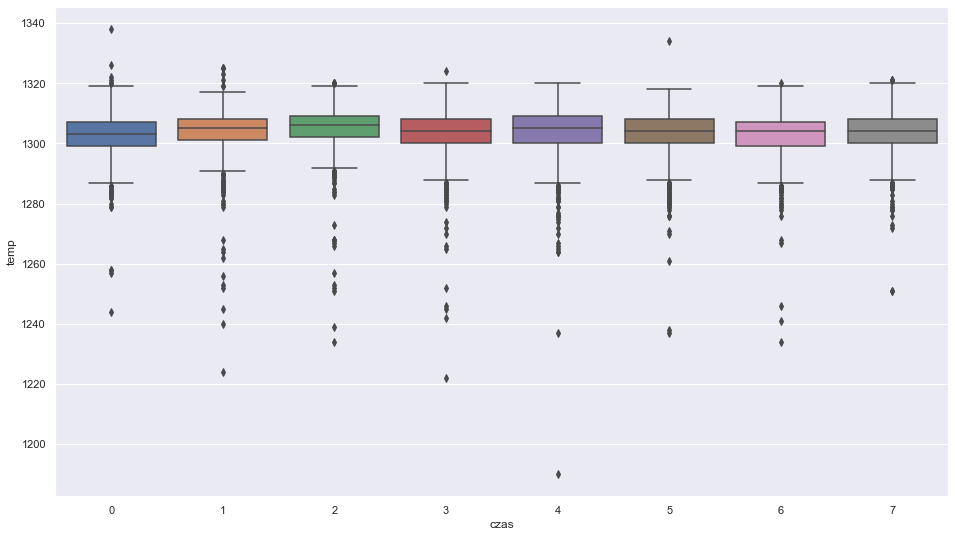

In [152]:

sns.boxplot(data = check_hours,
           x='czas',
           y='temp')

In [ ]:

stats.pearsonr(pd.get_dummies(check_hours['czas']),  check_hours['temp'])

np.corrcoef(pd.get_dummies(check_hours['czas']),  check_hours['temp'])


In [120]:
df_tidy_temp['time_temp'].dt.minute

0       1
59      0
60      1
119     0
120     1
       ..
1319    0
1320    1
1379    0
1380    1
1439    0
Name: time_temp, Length: 23426, dtype: int64

In [ ]:
sns.set(rc={'figure.figsize':(16,16)})
sns.pairplot(df_tidy)

In [66]:
df['TEMP.17 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.18 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.19 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.20 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.21 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP22 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.23 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.24 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.9 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.10 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.11 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.12 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.13 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.14 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.15 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.16 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.1 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.2 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.3 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.4 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.5 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.6 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.7 POD 2 WARSTWĄ WYMURÓWKI [°C]']+    df['TEMP.8 POD 2 WARSTWĄ WYMURÓWKI [°C]']


0       10055.783164
1       10055.761413
2       10055.739666
3       10055.717928
4       10055.696179
            ...     
1435    10027.211968
1436    10027.185943
1437    10027.159924
1438    10027.133902
1439    10027.107878
Length: 702780, dtype: float64

In [68]:
import statsmodels.api as sm
 
 
# performing the regression
# and fitting the model
result = sm.OLS(list(temp_zuz.temp_zuz), x).fit()
 
# printing the summary table
print(result.summary())

,Czas,temp_zuz,time_cet
0,2020-10-01 00:00:00,1297,2020-10-01 00:00:00+02:00
1,2020-10-01 01:00:00,1295,2020-10-01 01:00:00+02:00
2,2020-10-01 02:00:00,1303,2020-10-01 02:00:00+02:00
3,2020-10-01 02:30:00,1302,2020-10-01 02:30:00+02:00
4,2020-10-01 03:00:00,1303,2020-10-01 03:00:00+02:00
...,...,...,...
11379,2022-01-31 20:00:00,1305,2022-01-31 20:00:00+01:00
11380,2022-01-31 21:00:00,1304,2022-01-31 21:00:00+01:00
11381,2022-01-31 22:00:00,1308,2022-01-31 22:00:00+01:00
11382,2022-01-31 23:00:00,1309,2022-01-31 23:00:00+01:00


0        0
1        0
2        0
3        0
4        0
        ..
1435    23
1436    23
1437    23
1438    23
1439    23
Name: time_cet, Length: 702780, dtype: int64

In [88]:
temp_zuz.temp_zuz

0        1297
1        1295
2        1303
3        1302
4        1303
         ... 
11379    1305
11380    1304
11381    1308
11382    1309
11383    1305
Name: temp_zuz, Length: 11384, dtype: int64

In [45]:
help(pd.to_datetime(temp_zuz['Czas']).dt.tz_localize)

Help on method tz_localize in module pandas.core.accessor:

tz_localize(*args, **kwargs) method of pandas.core.indexes.accessors.DatetimeProperties instance
    Localize tz-naive Datetime Array/Index to tz-aware
    Datetime Array/Index.
    
    This method takes a time zone (tz) naive Datetime Array/Index object
    and makes this time zone aware. It does not move the time to another
    time zone.
    
    This method can also be used to do the inverse -- to create a time
    zone unaware object from an aware object. To that end, pass `tz=None`.
    
    Parameters
    ----------
    tz : str, pytz.timezone, dateutil.tz.tzfile or None
        Time zone to convert timestamps to. Passing ``None`` will
        remove the time zone information preserving local time.
    ambiguous : 'infer', 'NaT', bool array, default 'raise'
        When clocks moved backward due to DST, ambiguous times may arise.
        For example in Central European Time (UTC+01), when going from
        03:00 DST t

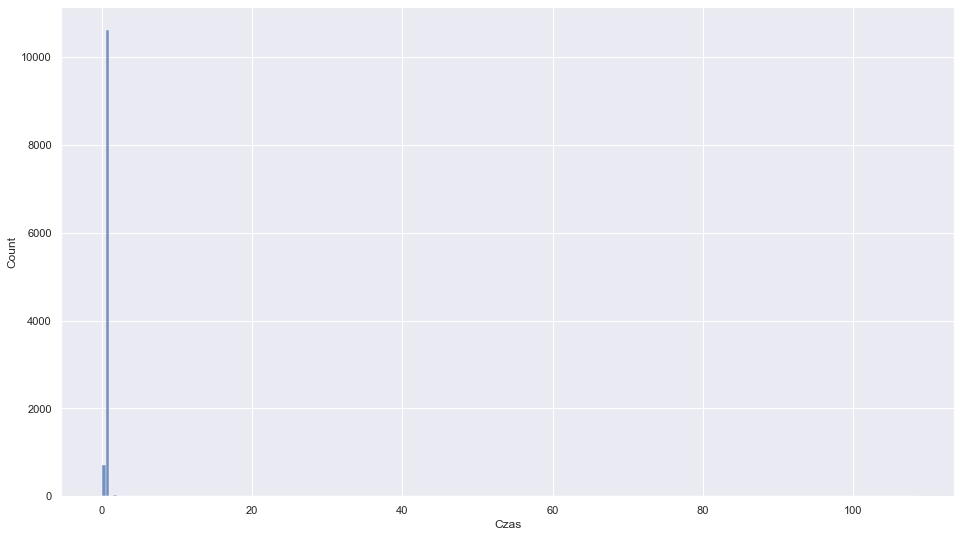

In [25]:

sns.histplot(pd.to_datetime(temp_zuz['Czas'], utc=True).diff().dt.total_seconds()/3600, binwidth=.5)